# Chest X-Ray Classification Analysis

# Imports

In [46]:
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageFile

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# Create Paths

In [31]:
PATH = "/Users/maukanmir/Downloads/chest_xray/"
train_path, val_path, test_path = PATH + "train/", PATH + "val/", PATH + "test/"

# Constants

In [3]:
BATCH_SIZE = 32
INPUT_SHAPE = (224,224,3)

# Functions

In [42]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

def process_load_image(img_path, target_size=INPUT_SHAPE):
  try:
    with Image.open(img_path) as img:
      img = img.resize(target_size[:2])
      img = img.convert("RGB")
      
      img_array = np.array(img)/255.0
      img_array = img_array.astype(np.float32)
      return img_array
  except IOError as e:
    print(f"Failure in loading this image: {e}")
    return None


def grab_images(path):
  
  images, labels = [],[]
  
  for root, dirs, files in os.walk(path):
    for file in files:
      if file.lower().endswith((".png", ".jpeg", ".jpg")):
        img_path = os.path.join(root, file)
        img = process_load_image(img_path)
        if img is not None:
          images.append(img)
          label = root.split(os.sep)[-1]
          labels.append(label)
  
  images, labels = np.array(images), np.array(labels)
  
  return images, labels

def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10, 6))
  plt.pie(counts, labels=unique, autopct="%1.1f%%", startangle=140)
  plt.title("Target Class Breakdown")
  plt.show()
  
  plt.figure(figsize=(10, 6))
  sns.countplot(x=target)
  plt.xlabel("Target Classes")
  plt.ylabel("Counts")
  plt.title("Target Class breakdown")
  plt.xticks(rotation=45)
  plt.show()

def plot_images(images, labels, num_images=12, img_size=INPUT_SHAPE):
  plt.figure(figsize=(10,10))
  for i in range(num_images):
    plt.subplot(3, 4, i+1)
    img = images[i].reshape(img_size[0], img_size[1], 3)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
  plt.show()

# Load and Extract Images

In [34]:
X_train, y_train = grab_images(train_path)
X_val, y_val = grab_images(val_path)
X_test, y_test = grab_images(test_path)

# Dataset Shapes

In [35]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 5216
Validation set size: 16
Test set size: 624


# Check Class Imbalance

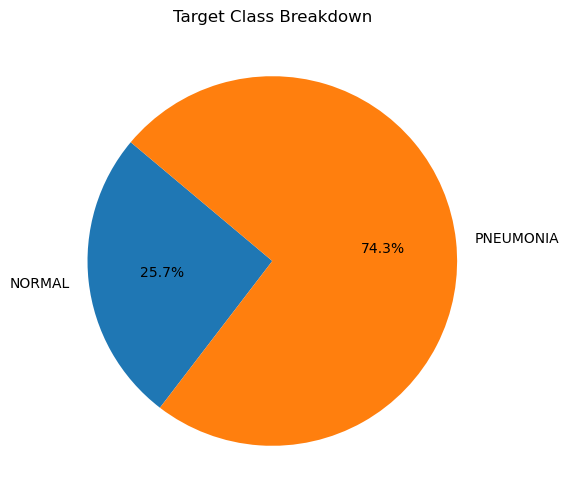

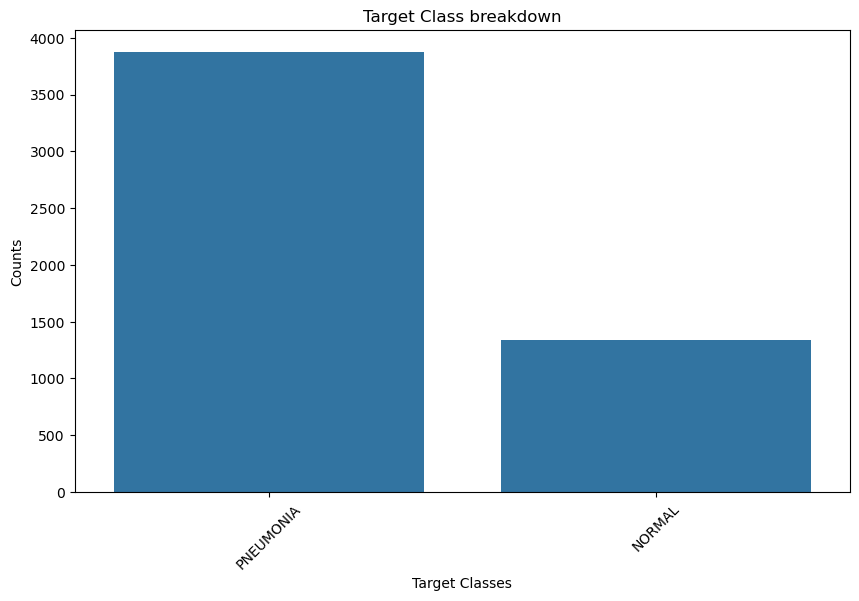

In [36]:
check_class_imbalance(y_train)

# We have an imbalanced dataset

# Let's get a look at our image dataset

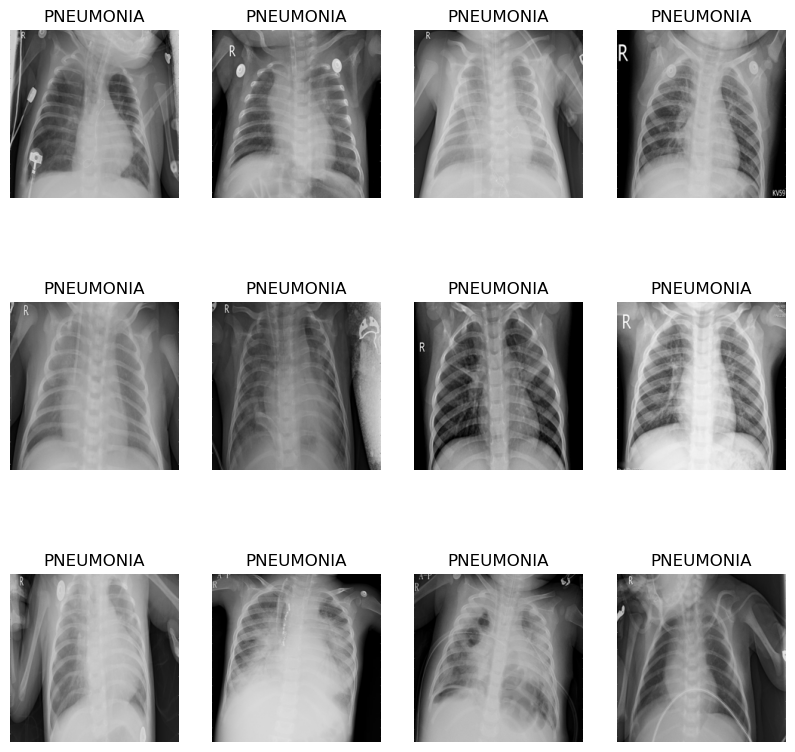

In [43]:
plot_images(X_train, y_train)

# Data Augmentation

In [47]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=0.2,
  height_shift_range=0.2,
  width_shift_range=0.2,
  shear_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest"
  )

val_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size=INPUT_SHAPE[:2],
  batch_size=BATCH_SIZE,
  class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
  val_path,
  target_size=INPUT_SHAPE[:2],
  batch_size=BATCH_SIZE,
  class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
  test_path,
  target_size=INPUT_SHAPE[:2],
  batch_size=BATCH_SIZE,
  class_mode="binary"
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
